# Patch-Level Classification 
Can we do better by filtering out the noisy patches?  
Define noise as too much background or too much RBC.  
Here, develop filters.  
Train and test filtered data in Patch.05 notebook.  

In [1]:
import datetime
print(datetime.datetime.now())
from platform import python_version
print('Python',python_version())
import numpy as np
import pandas as pd
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)
#import tensorflow as tf
#tf.config.list_physical_devices('GPU')

2022-06-28 16:32:22.739498
Python 3.8.10
sklearn 1.0.2


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.feature_selection import RFE
import joblib # used to dump/load sklearn models
from CellProfiler_Util import CP_Util
from RandomForestUtil import RF_Util

In [3]:
BASE_DIR='/home/jrm/Adjeroh/Naved/CP_80K/'  # Alien
#BASE_DIR='D:\\Adjeroh\\Naved\\CP_80K\\'  # Windows
CLASSES=['Output0/','Output1/','Output2/','Output3/','Output4/','Output5/',]
MODELS_DIR='/home/jrm/Adjeroh/Naved/CP_80K/models/Patch.04'  # Alien
#MODELS_DIR='D:\\Adjeroh\\Naved\\CP_80K\\models\\Patch.04'  # Windows

# These patches were used to tune the CellProfiler pipeline
EXCLUDE = [ [311], [12], [30,41], [87], [67], [26,46] ]
IMAGE_FILENAME = 'Process100_Image.csv'

In [4]:
print(datetime.datetime.now())
X = None
y = None
for i in range(0,6):
    image_file = BASE_DIR+CLASSES[i]+IMAGE_FILENAME
    patch_info = pd.read_csv(image_file)
    # remove identifying information
    patch_info = patch_info.set_index(['ImageNumber'])
    patch_info = patch_info.drop(EXCLUDE[i])
    patch_info = patch_info.reset_index()
    Xi = patch_info.drop(columns=['ImageNumber','Group_Index'])  
    Xi = Xi.select_dtypes(include='number')   # drop strings esp filename
    too_much_RBC = len(Xi['AreaOccupied_AreaOccupied_MergeRBC']>=3333)
    not_enough_tissue = len(Xi['AreaOccupied_AreaOccupied_Tissue']<=80000)
    size = len(Xi)
    yi = np.ones(size) * i   # e.g. class 3
    if X is None:
        X = Xi
        y = yi
    else:
        X = pd.concat( (X,Xi) )
        y = np.concatenate( (y,yi) )
    X.fillna(0,inplace=True)  
    print(i,X.shape,len(y),too_much_RBC,not_enough_tissue)    

2022-06-28 16:32:23.262746
0 (44965, 5338) 44965 44965 44965
1 (57866, 5338) 57866 12901 12901
2 (71814, 5338) 71814 13948 13948
3 (78177, 5338) 78177 6363 6363
4 (81373, 5338) 81373 3196 3196
5 (82962, 5338) 82962 1589 1589


In [5]:
cols = X.columns
for c in cols:
    if "_RBC" in c:
        print(c)

Count_RBC
Mean_RBC_Location_Center_X
Mean_RBC_Location_Center_Y
Mean_RBC_Location_Center_Z
Median_RBC_Location_Center_X
Median_RBC_Location_Center_Y
Median_RBC_Location_Center_Z
StDev_RBC_Location_Center_X
StDev_RBC_Location_Center_Y
StDev_RBC_Location_Center_Z
Threshold_FinalThreshold_RBC
Threshold_OrigThreshold_RBC
Threshold_SumOfEntropies_RBC
Threshold_WeightedVariance_RBC


2022-06-28 16:37:12.160013
2022-06-28 16:37:13.526741


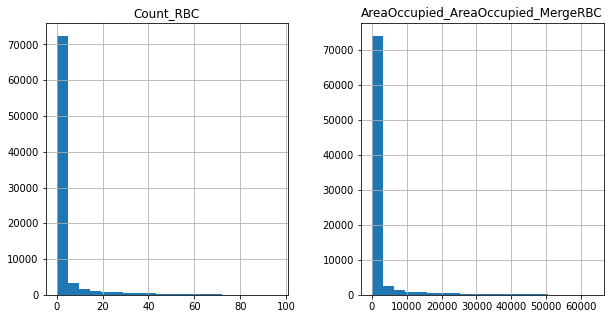

In [6]:
print(datetime.datetime.now())
X.hist(column=['Count_RBC','AreaOccupied_AreaOccupied_MergeRBC'],bins=20,figsize=(10,5))
print(datetime.datetime.now())

In [7]:
cols = X.columns
for c in cols:
    if "_Tissue" in c:
        print(c)

AreaOccupied_AreaOccupied_Tissue
AreaOccupied_Perimeter_Tissue
AreaOccupied_TotalArea_Tissue
Count_Tissue
Mean_Tissue_AreaShape_Area
Mean_Tissue_AreaShape_BoundingBoxArea
Mean_Tissue_AreaShape_BoundingBoxMaximum_X
Mean_Tissue_AreaShape_BoundingBoxMaximum_Y
Mean_Tissue_AreaShape_BoundingBoxMinimum_X
Mean_Tissue_AreaShape_BoundingBoxMinimum_Y
Mean_Tissue_AreaShape_Center_X
Mean_Tissue_AreaShape_Center_Y
Mean_Tissue_AreaShape_CentralMoment_0_0
Mean_Tissue_AreaShape_CentralMoment_0_1
Mean_Tissue_AreaShape_CentralMoment_0_2
Mean_Tissue_AreaShape_CentralMoment_0_3
Mean_Tissue_AreaShape_CentralMoment_1_0
Mean_Tissue_AreaShape_CentralMoment_1_1
Mean_Tissue_AreaShape_CentralMoment_1_2
Mean_Tissue_AreaShape_CentralMoment_1_3
Mean_Tissue_AreaShape_CentralMoment_2_0
Mean_Tissue_AreaShape_CentralMoment_2_1
Mean_Tissue_AreaShape_CentralMoment_2_2
Mean_Tissue_AreaShape_CentralMoment_2_3
Mean_Tissue_AreaShape_Compactness
Mean_Tissue_AreaShape_ConvexArea
Mean_Tissue_AreaShape_Eccentricity
Mean_Tissue_A

2022-06-28 16:37:13.679485
2022-06-28 16:37:13.737137


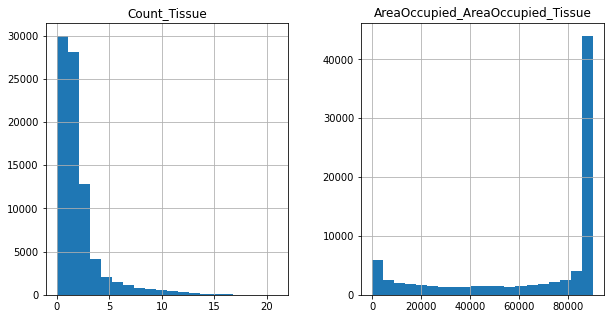

In [8]:
print(datetime.datetime.now())
X.hist(column=['Count_Tissue','AreaOccupied_AreaOccupied_Tissue'],bins=20,figsize=(10,5))
print(datetime.datetime.now())